Este conjunto de dados fornece uma ampla gama de informações sobre diferentes países. Algumas questões interessantes que podem ser exploradas a partir desses dados incluem:

1. **Correlação entre Densidade Populacional e Outras Variáveis:** Você pode investigar como a densidade populacional se relaciona com variáveis como área de terra, taxa de natalidade, taxa de mortalidade infantil, expectativa de vida, etc.



3. **Desenvolvimento Econômico e Educação:** Explore a relação entre o PIB, matrícula em educação primária e terciária, e o percentual de matrícula bruta nessas áreas.

4. **Saúde e Demografia:** Compare as taxas de mortalidade infantil, taxa de natalidade, mortalidade materna e expectativa de vida para entender a relação entre saúde e demografia.

5. **Política e Economia:** Estude a relação entre o índice de percepção de corrupção (CPI), mudanças no CPI, taxas de impostos, receita fiscal e outros indicadores político-econômicos.

6. **Distribuição Geográfica:** Analise a distribuição geográfica dos países com base em coordenadas de latitude e longitude para encontrar padrões regionais.

7. **Participação da Força de Trabalho e Desemprego:** Explore como a participação da força de trabalho, a taxa de desemprego e a urbanização estão interligadas.

8. **Estabelecer categorias de países:** Realizar classificações por critérios como GDP, extensão, educação, etc
Lembre-se de que as análises dependerão de suas perguntas específicas e do contexto que você está buscando entender a partir dos dados.

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv('./../../Datasets/word-data-2023-01-com-labels.csv')
data.drop(data.columns[0], axis=1, inplace=True)

# clean column names
data.columns = [str(col).lower().replace('(', '').replace(')', '') \
                .replace(' ', '_').replace('\n', '').replace('/', '_') \
                .replace(':', '') \
                for col in data.columns]

## Configs and functions

In [81]:
DARKGRID = "darkgrid"
sns.set_style(DARKGRID)


# Selecionando pares de variáveis com correlação positiva > limit
def select_best_corr(corr_df_, cut_limit=0.75):
    corr_matrix_unstacked = corr_df_.unstack().copy()
    corr_matrix_unstacked.sort_values(ascending=False, inplace=True)

    pos = set([(col1, col2, corr_matrix_unstacked[col1, col2]) for col1, col2 in corr_matrix_unstacked.index \
           if corr_matrix_unstacked[col1, col2] > cut_limit and col1 != col2])
    
    neg = set([(col1, col2, corr_matrix_unstacked[col1, col2]) for col1, col2 in corr_matrix_unstacked.index \
           if corr_matrix_unstacked[col1, col2] < (cut_limit * -1) and col1 != col2])
    
    return pos, neg


2. **Impacto da Atividade Agrícola no Meio Ambiente:** Analise como a percentagem de terra usada para atividades agrícolas está relacionada com emissões de CO2, área de floresta, entre outras variáveis ambientais.

In [82]:
# selecionar features que tenha a ver com esse assunto
agricultura_features = ['densityp_km2', 'agricultural_land_%', 'land_areakm2', 'co2-emissions', 'forested_area_%', 
      'gasoline_price', 'gdp', 'gross_primary_education_enrollment_%',
      'gross_tertiary_education_enrollment_%', 'minimum_wage', 'population', 
      'population_labor_force_participation_%', 'urban_population']
agricultura_df = data.loc[:, agricultura_features].copy()

In [83]:
agricultura_cm = agricultura_df.corr()
agricultura_cm.style.background_gradient()

,densityp_km2,agricultural_land_%,land_areakm2,co2-emissions,forested_area_%,gasoline_price,gdp,gross_primary_education_enrollment_%,gross_tertiary_education_enrollment_%,minimum_wage,population,population_labor_force_participation_%,urban_population
densityp_km2,1.000000,-0.033645,-0.053637,-0.019218,-0.032696,0.224237,-0.018790,0.003602,0.019196,0.249618,-0.017870,0.019065,-0.023438
agricultural_land_%,-0.033645,1.000000,-0.031372,0.061898,-0.434566,0.045731,0.051623,-0.046669,-0.109088,-0.002432,0.117165,-0.108046,0.101364
land_areakm2,-0.053637,-0.031372,1.000000,0.591510,-0.014244,-0.183163,0.550855,0.006032,0.223394,0.140740,0.446891,-0.006003,0.547687
co2-emissions,-0.019218,0.061898,0.591510,1.000000,-0.027207,-0.068345,0.916978,0.001930,0.157411,0.090509,0.810229,-0.013108,0.926331
forested_area_%,-0.032696,-0.434566,-0.014244,-0.027207,1.000000,0.123949,-0.000559,0.142624,-0.012679,-0.013233,-0.055554,0.141633,-0.034752
gasoline_price,0.224237,0.045731,-0.183163,-0.068345,0.123949,1.000000,-0.018332,-0.069283,0.148140,0.323638,-0.069534,-0.011484,-0.072518
gdp,-0.018790,0.051623,0.550855,0.916978,-0.000559,-0.018332,1.000000,-0.004106,0.214354,0.218397,0.632505,-0.006399,0.784549
gross_primary_education_enrollment_%,0.003602,-0.046669,0.006032,0.001930,0.142624,-0.069283,-0.004106,1.000000,-0.004799,-0.037568,0.039502,0.219505,0.028603
gross_tertiary_education_enrollment_%,0.019196,-0.109088,0.223394,0.157411,-0.012679,0.148140,0.214354,-0.004799,1.000000,0.452364,0.028720,-0.158007,0.100441
minimum_wage,0.249618,-0.002432,0.140740,0.090509,-0.013233,0.323638,0.218397,-0.037568,0.452364,1.000000,-0.027627,-0.073154,0.029364


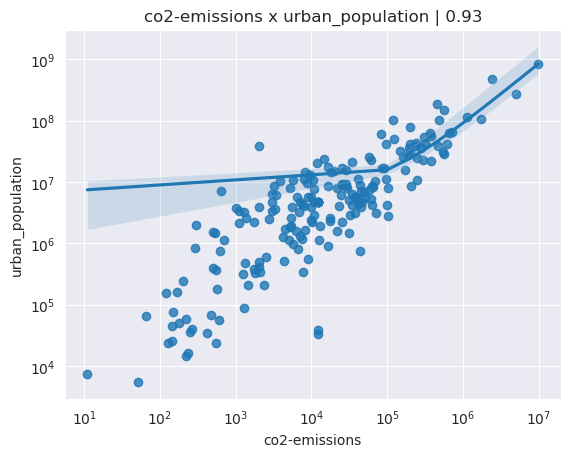

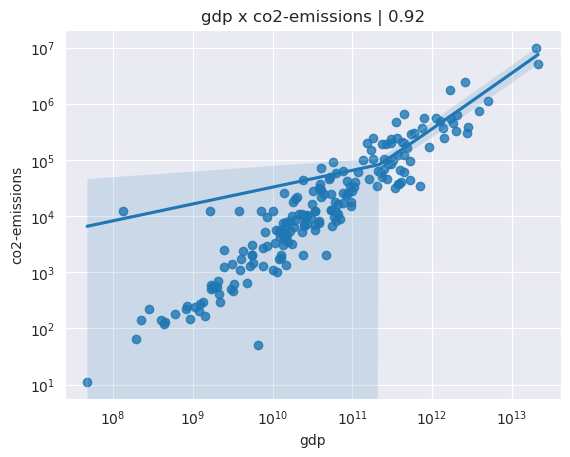

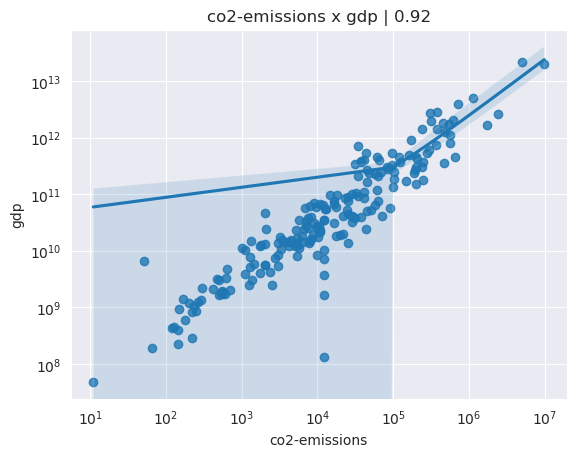

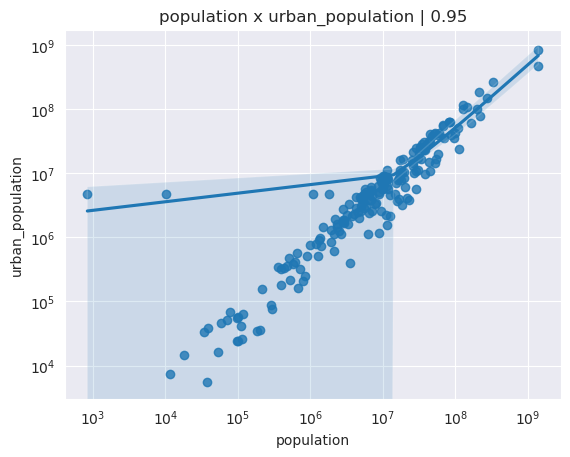

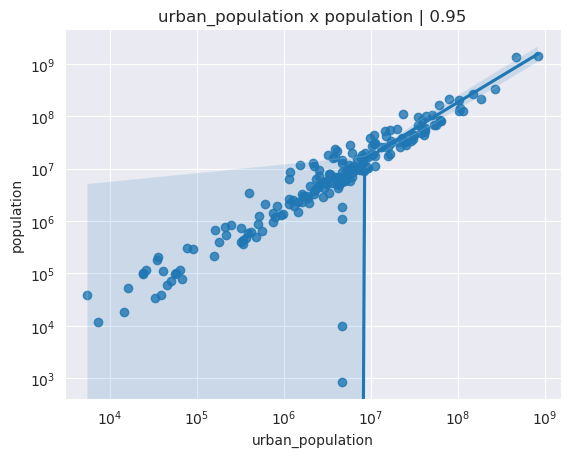

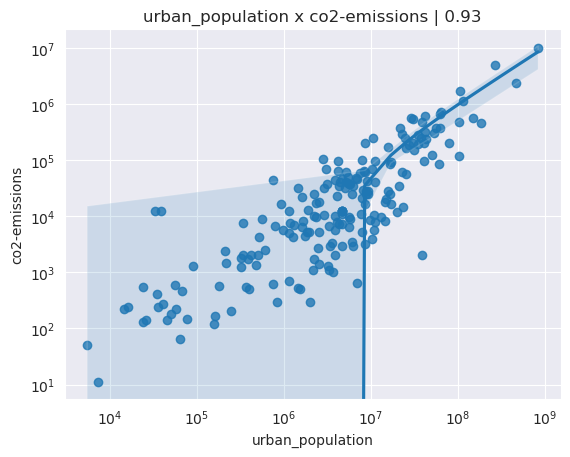

In [84]:
# correlações positivas 
for orientacao in [0, 1]:
       for correlacao in select_best_corr(agricultura_cm, .9)[orientacao]:
              sns.regplot(data=agricultura_df, x=correlacao[0], y=correlacao[1])
              plt.title(f"{correlacao[0]} x {correlacao[1]} | {round(correlacao[2], 2)}")
              plt.xscale('log')
              plt.yscale('log')
              plt.show()

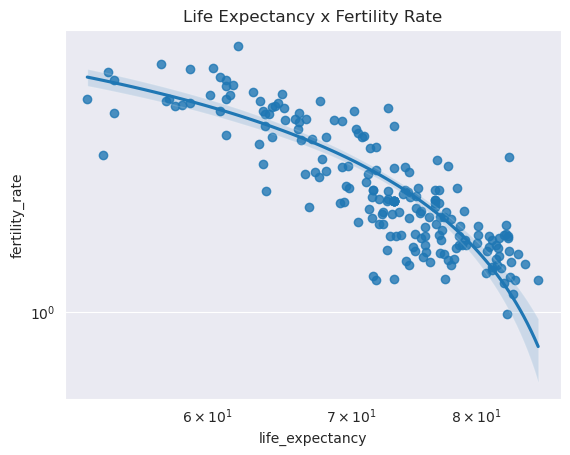

In [85]:
sns.regplot(data=data, x='life_expectancy', y='fertility_rate')
plt.title(f"Life Expectancy x Fertility Rate")
plt.xscale('log')
plt.yscale('log')
plt.show()

1. Os países que mais poluem, são os que possuem maior PIB (GDP); esta característica se acentúa na faixa dos países mais ricos 
2. Outro fator que parece estar relacionado com a emissão de Co2 é o maior percentual de população urbana, que por sua vez está diretamente relacionado com a população geral.

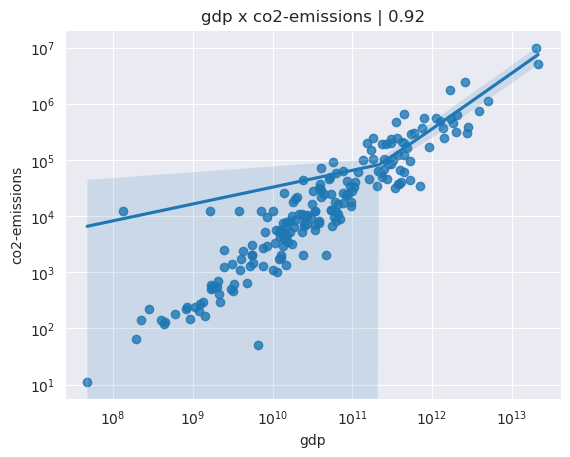
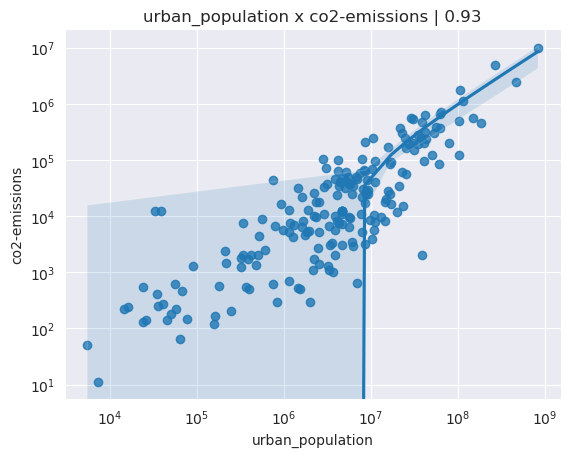

3. Os países com maior taxa de natalidade possuem a menor expectativa de vida

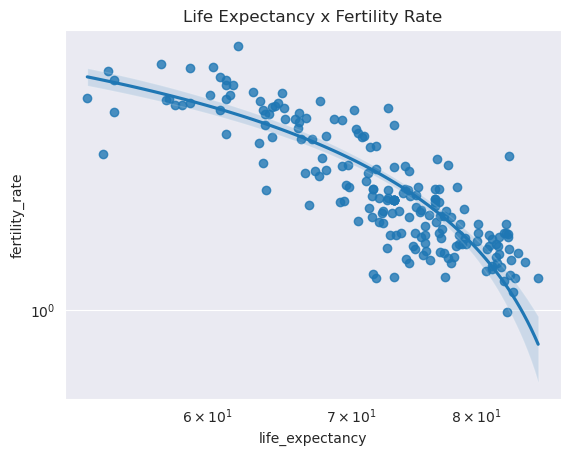